# OASIS INFOBYTE

## Task : Unemployment Analysis with Python      
**Objective:** Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.      
**Dataset:-** https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [2]:
#reading the dataset and storing it as a dataframe
df = pd.read_csv('/Users/asaifali/Desktop/Internships/Oasis Infobyte/Unemployment in India/Unemployment_Rate_upto_11_2020.csv', encoding='latin1')

In [3]:
#displaying the dataframe
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
#displaying the shape
df.shape

(267, 9)

In [5]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
#checking for null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
#as we have no null values, so don't need to handle them

In [8]:
#changing column names so that they dont have white-spaces, numbers or any special-characters
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [9]:
#displaying the updated dataframe
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74


In [10]:
#converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [11]:
#converting the 'Frequency' column to categorical data type
df['Frequency']= df['Frequency'].astype('category')

In [12]:
#extracting the 'Month' from the Date
df['Month'] =  df['Date'].dt.month

In [13]:
#creating a new column 'MonthNumber' by converting the 'Month' column values to integers
df['MonthNumber'] = df['Month'].apply(lambda x : int(x))

In [14]:
#creating a new column 'MonthName' by converting the 'MonthNumber' column values to the monthNames
df['MonthName'] =  df['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [15]:
#ensuring the categorical vairable
df['Region'] = df['Region'].astype('category')

In [16]:
#dropping the Month column as it in irrelevant now
#we have extracted the monthNumbers and monthNames individually
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,MonthNumber,MonthName
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


## Statistics

In [17]:
#5-number summary
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,MonthNumber
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000


In [18]:
#5-number summary of the numerical variables which give some information
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2)

#rounded to 2 decimal points and transposed to get a horizontal version

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [19]:
#grouping by 'Region' and finding mean values for the numerical columns
regionStats = df.groupby(['Region'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

#rounding the values to 2 decimal points
round(regionStats,2)

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


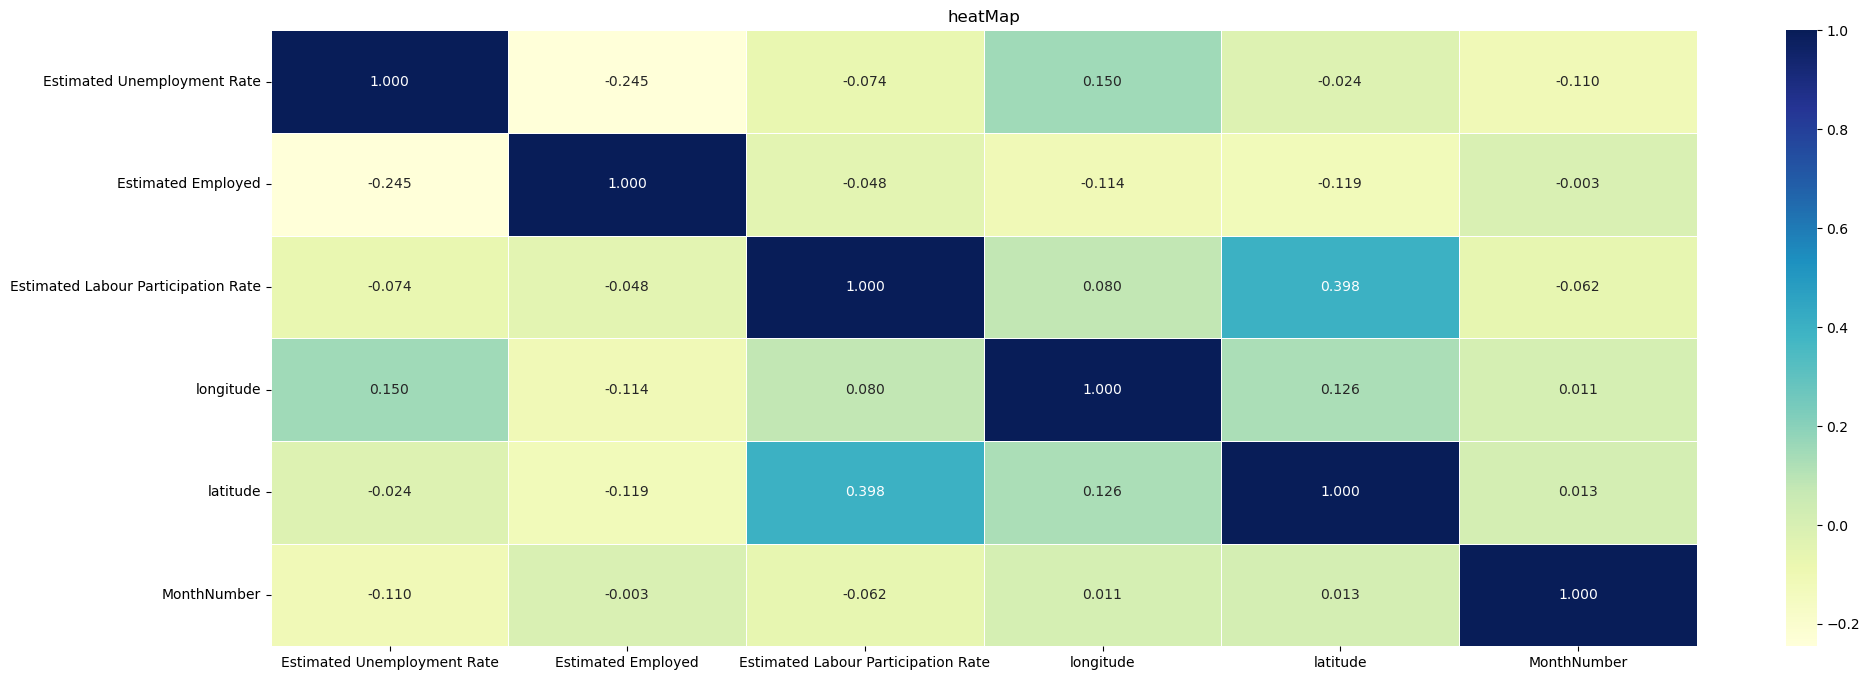

In [20]:
#constructing a 'heatMap' to find the 'pair-wise correlation' values

#dataframe of all the numerical columns
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed', 
              'Estimated Labour Participation Rate', 'longitude', 'latitude', 'MonthNumber']]

#constructing on heatMap with correlation values
heatMap = heatMap.corr()

#plotting the figure
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='YlGnBu', fmt='.3f', linewidths=0.5)
plt.title('heatMap')
plt.show()

## EDA - Exploratory Data Analysis

In [21]:
#plotting a box-plot to show un-employment rate in each state
fig = px.box(
    df,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='unemploymentRate',
    template='plotly'
)
fig.show()

In [22]:
#creating a scatter matrix plot to denote relationship
fig = px.scatter_matrix(df,
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [23]:
#plotting a "Bar-plot" to find the "average unemployment rate in each state"
DF = df[['Estimated Unemployment Rate','States']]

#grouping the dataframe by 'States' and finding the corresponding 'mean'
DF = DF.groupby('States').mean().reset_index()

#sorting the values in the dataframe
DF = DF.sort_values('Estimated Unemployment Rate')

fig = px.bar(DF, 
             x='States',
             y='Estimated Unemployment Rate',
             color='States',
             title='State-wise Average Employment Rate')
fig.show()

In [24]:
#plotting a "Bar-plot" to find the "unemployment rate" for each "Region" month-wise
fig = px.bar(df, 
             x='Region',
             y='Estimated Unemployment Rate',
             animation_frame = 'MonthName',
             color='States',
             title='Region-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()

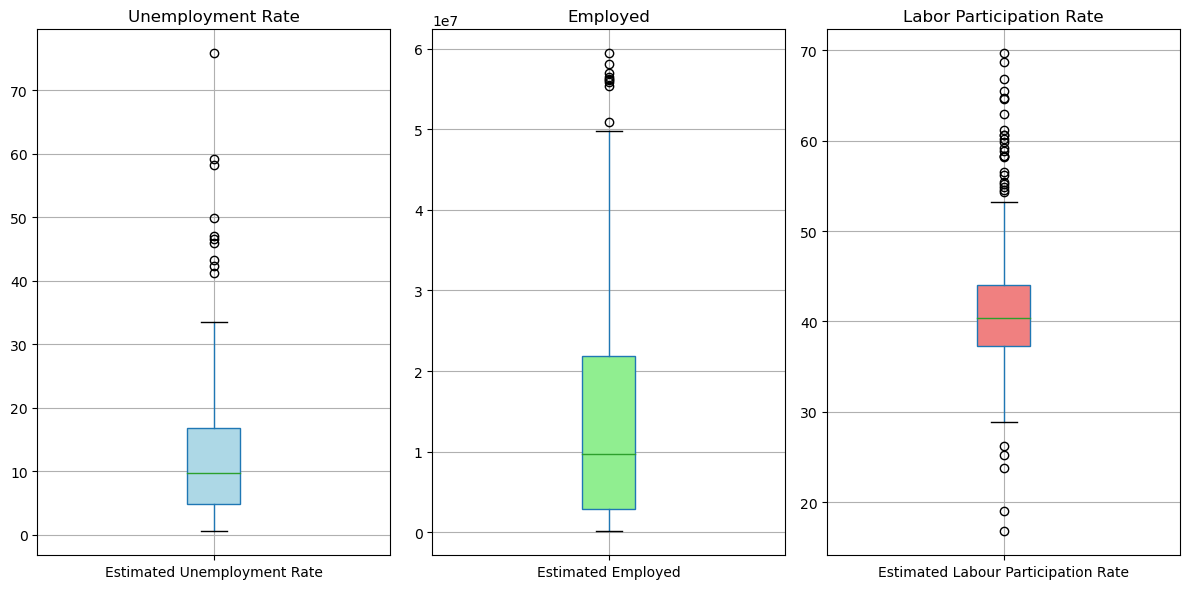

In [25]:
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

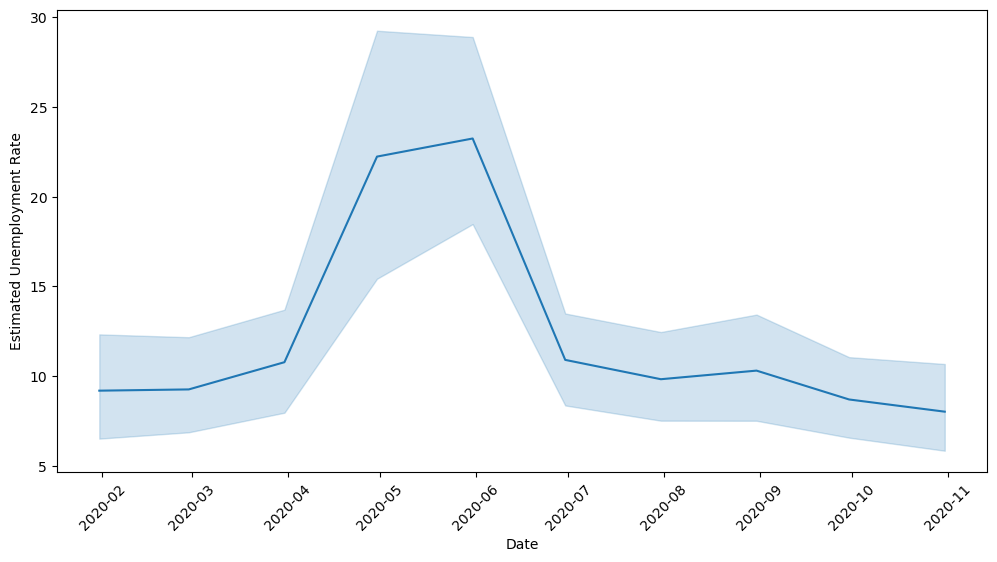

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

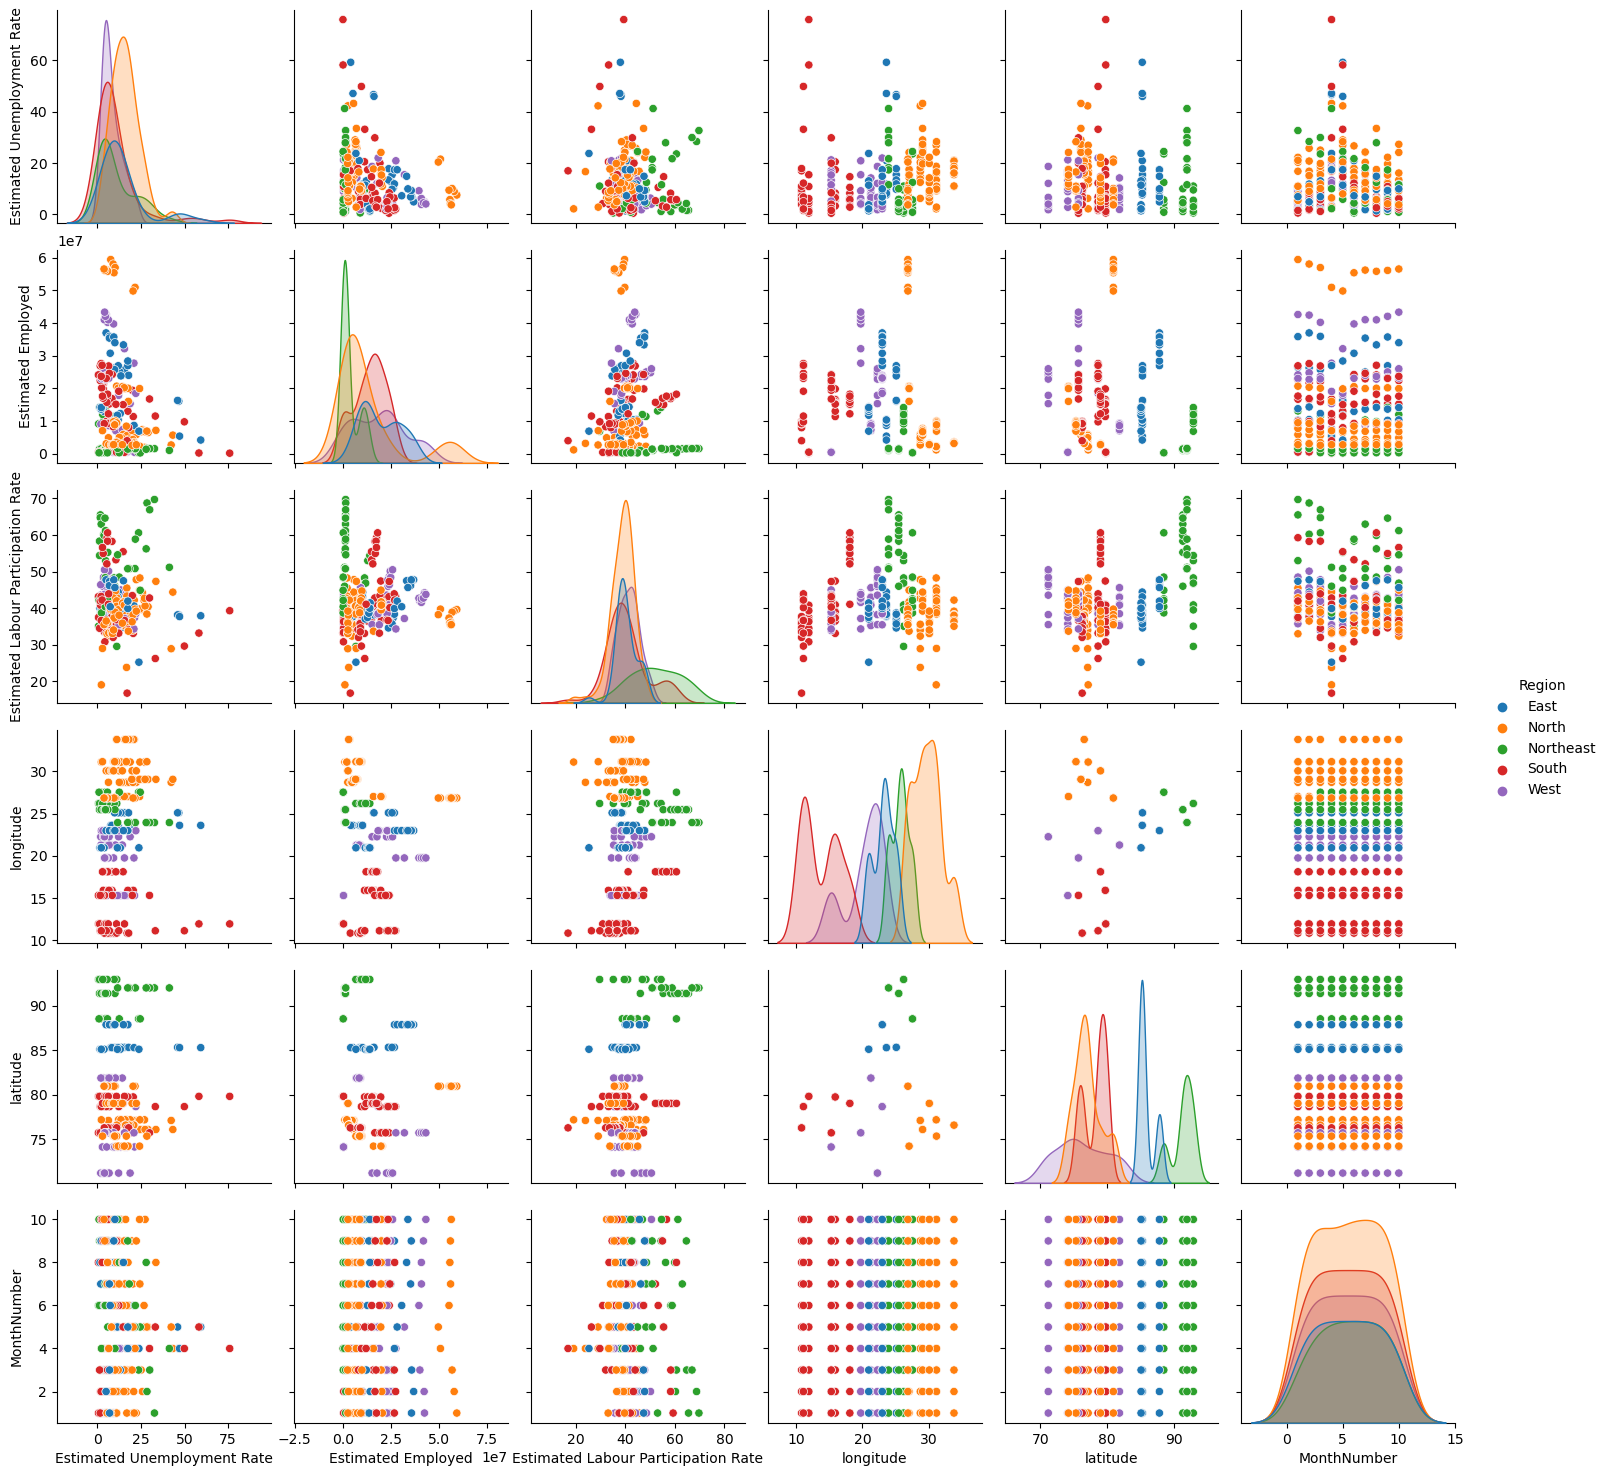

In [27]:
sns.pairplot(df, hue='Region')

In [28]:
import plotly.express as px
plot_unemp = df[['Estimated Unemployment Rate','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemployed, x='Region',y='Estimated Unemployment Rate',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

In [29]:
fig = px.violin(
    df,
    x='Region',
    y='Estimated Unemployment Rate',
    title='Distribution of Unemployment Rates by Regions',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()


In [30]:
fig = px.area(
    df,
    x='Date',
    y='Estimated Labour Participation Rate',
    color='Region',
    labels={'Estimated Labour Participation Rate': 'Labour Participation Rate'},
    category_orders={'Region': df['Region'].unique()}  # Preserve the order of regions
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Labour Participation Rate',
    legend_title='Region',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    category      
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    category      
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
 9   MonthNumber                          267 non-null    int64         
 10  MonthName     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chhattisgarh'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Goa'),
  Text(6, 0, 'Gujarat'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'Jammu & Kashmir'),
  Text(10, 0, 'Jharkhand'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Maharashtra'),
  Text(15, 0, 'Meghalaya'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana'),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

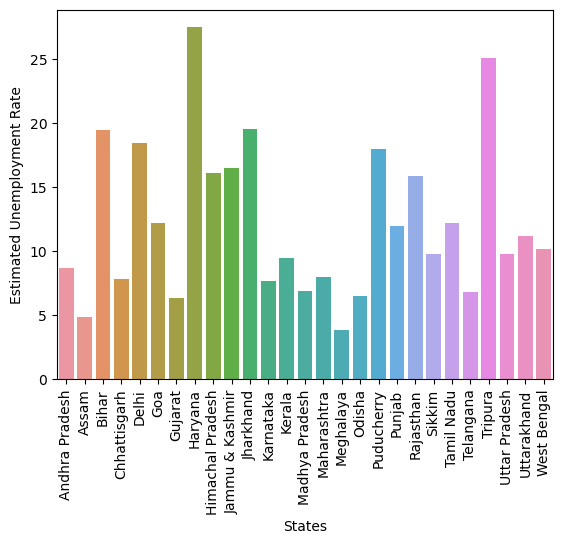

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


state_avg_unemployment = df.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
sns.barplot(x='States', y='Estimated Unemployment Rate', data=state_avg_unemployment)
plt.xticks(rotation=90)


In [33]:
#creating a new dataframe with 'State-wise' & 'Region-wisee' Estimated Unemployment Rate
unempDF = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

unempDF = df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index()

#printing the new dataframe
unempDF.head(4)

,Region,States,Estimated Unemployment Rate
0,East,Andhra Pradesh,NaN
1,East,Assam,NaN
2,East,Bihar,19.471
3,East,Chhattisgarh,NaN


In [34]:
unempDF.isnull().sum()

Region                           0
States                           0
Estimated Unemployment Rate    108
dtype: int64

In [35]:
# Assuming unempDF is the DataFrame that you want to fill missing values in
# You can replace 'value' with the desired value you want to use to fill the missing values
unempDF.fillna(value=unempDF['Estimated Unemployment Rate'].mean(), inplace=True)


In [36]:
unempDF

,Region,States,Estimated Unemployment Rate
0,East,Andhra Pradesh,12.234529
1,East,Assam,12.234529
2,East,Bihar,19.471000
3,East,Chhattisgarh,12.234529
4,East,Delhi,12.234529
...,...,...,...
130,West,Telangana,12.234529
131,West,Tripura,12.234529
132,West,Uttar Pradesh,12.234529
133,West,Uttarakhand,12.234529


In [37]:
#a sunburst chart (hierarchical chart) for unemployment rate region-wise and state-wise
fig = px.sunburst(unempDF, 
                  path=['Region','States'], 
                  values='Estimated Unemployment Rate',
                  title= 'unemployment rate in each region and state',
                  height=650)
fig.show()

## Impact of Lockdown on States Estimated Employed

In [38]:
#creating a scatter geospatial plot
fig = px.scatter_geo(df,'longitude', 'latitude', 
                     color="Region",
                     hover_name="States", 
                     size="Estimated Unemployment Rate",
                     animation_frame="MonthName",
                     scope='asia',
                     title='Lockdown Impact throughout India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

#updating the geospatial axes ranges and ocean color
fig.update_geos(lataxis_range=[5,35], 
                lonaxis_range=[65, 100],
                oceancolor="#6dd5ed",
                showocean=True)

fig.show()

In [39]:
#filtering dataset between month 4 and 7 (inclusive) - after lockdown
df_un = df[(df['MonthNumber'] >= 4) & (df['MonthNumber'] <=7)]

#filtering dataset between month 1 and 4 (inclusive) - before lockdown
df_un_12 = df[(df['MonthNumber'] >= 1) & (df['MonthNumber'] <=4)]

In [40]:
#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df_un = df_un.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df_un_12 = df_un.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#clubbing the 2 dataframe values
df_un['Unemployment Rate before lockdown'] = df_un_12['Estimated Unemployment Rate']

#renaming the column values for better understanding
df_un.columns = ['States','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']

#displaying the top results
df_un.head()

,States,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown
0,Andhra Pradesh,12.3975,12.3975
1,Assam,6.2450,6.2450
2,Bihar,30.8025,30.8025
3,Chhattisgarh,9.6025,9.6025
4,Delhi,24.3600,24.3600


In [41]:
#computing the % change in unemployment rate
df_un['% change in unemployment'] = round(df_un['unemploymentRate A/ lockdown'] - df_un['unemploymentRate B/ lockdown']/df_un['unemploymentRate B/ lockdown'],2)

In [42]:
#sorting the values in the "after lockdown dataframe" on the basis of "%change in unemployment"
df_un = df_un.sort_values('% change in unemployment')

In [43]:
#plotting a 'bar-chart' for the "%change in unemployment A/ lockdown"
fig = px.bar(df_un,x='States',y='% change in unemployment',
             color='% change in unemployment',
             title='% change in Unemployment A/ Lockdown')

fig.show()

In [44]:
#defining a function to sort the values based on impact
#from the above 'box-plot', the values are ranging between 0 and 40

def sort_impact(x):
    if x <= 10:
        #impactedState
        return 'impactedState'
    
    elif x <= 20:
        #hardImpactedState
        return 'hardImpactedState'
    
    elif x <= 30:
        #harderImpactedState
        return 'harderImpactedState'
    
    elif x <= 40:
        #hardestImpactedState
        return 'hardestImpactedState'
    
    return x    

In [45]:
#adding a new column to the 'dataframe', classifying the "%change in employment" on the basis of impactStatus
df_un['impactStatus'] = df_un['% change in unemployment'].apply(lambda x:sort_impact(x))

In [46]:
df_un

,States,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown,% change in unemployment,impactStatus
15,Meghalaya,4.800000,4.800000,3.80,impactedState
1,Assam,6.245000,6.245000,5.24,impactedState
25,Uttarakhand,8.870000,8.870000,7.87,impactedState
20,Sikkim,8.925000,8.925000,7.93,impactedState
6,Gujarat,8.965000,8.965000,7.96,impactedState
22,Telangana,9.215000,9.215000,8.22,impactedState
3,Chhattisgarh,9.602500,9.602500,8.60,impactedState
16,Odisha,10.205000,10.205000,9.20,impactedState
13,Madhya Pradesh,11.475000,11.475000,10.48,hardImpactedState
26,West Bengal,12.235000,12.235000,11.24,hardImpactedState


In [47]:
#plotting a "bar-graph" to classify and denote the impack of lockdown on employment for different states
fig = px.bar(df_un, 
             y='States',
             x='% change in unemployment',
             color='impactStatus',
             title='Lockdown Impact on Employment in India')

fig.show()